# Agrupando colores

Vamos a crear imagenes con una cantidad fija de colores

#### 1. Importa las librerias
Vamos a necesitar `KMeans` de `sklearn.cluster`, `imread` de `matplotlib.image`, `matplotlib.pyplot` y `numpy`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

#### 2. Lee las imagenes
Utiliza alguna foto que tengas en tu ordenador y leela con la función `imread`

Consejo: utiliza una imagen pequeña si no quieres tardar una eternidad en que se ejecute el kmeans

In [11]:
image = imread("PROF_img/ladybug.png")
image.shape

(533, 800, 3)

In [12]:
print(type(image))

<class 'numpy.ndarray'>


Muestra la imagen para ver que se ha cargado bien

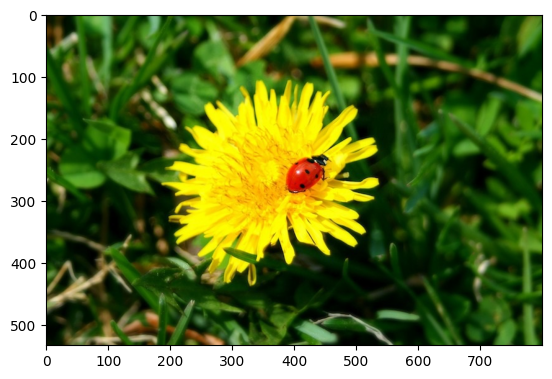

In [10]:
plt.imshow(image);

#### 3. Modifica la estructura de la imagen
Queremos que cada pixel sea una observación por lo que tenemos que transformar nuestra imagen de un vector de forma (alto, ancho, color) a (alto x ancho, color). Color será siempre 3, que son los tres canales de los colores.

Ej: (300, 400, 3) -> (120000, 3)

In [13]:
image_res = image.reshape(image.shape[0] * image.shape[1], -1)

In [14]:
image_res.shape

(426400, 3)

#### 4. K-means
Haz un k-means con la imagen de entrada (Con la nueva forma que le hemos dado). K será el número de colores que quieras que tenga tu imagen de salida

In [15]:
kmeans = KMeans(n_clusters = 10, random_state = 0)

In [16]:
kmeans.fit(image_res)

KMeans(n_clusters=10, random_state=0)

In [17]:
image_res

array([[0.09803922, 0.11372549, 0.00784314],
       [0.09411765, 0.10980392, 0.00392157],
       [0.09411765, 0.11372549, 0.        ],
       ...,
       [0.03921569, 0.22745098, 0.        ],
       [0.01960784, 0.20392157, 0.        ],
       [0.00784314, 0.1882353 , 0.        ]], dtype=float32)

#### 5. Sustituye cada valor por su centroide

Una vez hemos entrenado el kmeans entre otros parametros de salida tiene `cluster_centers_` y `labels_`. Utilizas para crear una nueva imagen (recuerda que las imagenes simplemente son vectores numéricos) en la que cada pixel se sustituye por su centroide correspondiente.

In [18]:
kmeans.labels_.shape

(426400,)

In [19]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[0.06765409, 0.2105306 , 0.01111445],
       [0.90742904, 0.7446872 , 0.03023267],
       [0.35183066, 0.55964994, 0.1788123 ],
       [0.26088038, 0.42386904, 0.07916962],
       [0.98449963, 0.9424231 , 0.02616868],
       [0.54156196, 0.49458885, 0.16691253],
       [0.0168848 , 0.09343135, 0.00512766],
       [0.80480707, 0.1612719 , 0.03961181],
       [0.6302422 , 0.6566211 , 0.42618948],
       [0.15580428, 0.3210248 , 0.03076736]], dtype=float32)

In [21]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_]

In [22]:
segmented_img

array([[0.0168848 , 0.09343135, 0.00512766],
       [0.0168848 , 0.09343135, 0.00512766],
       [0.0168848 , 0.09343135, 0.00512766],
       ...,
       [0.06765409, 0.2105306 , 0.01111445],
       [0.06765409, 0.2105306 , 0.01111445],
       [0.06765409, 0.2105306 , 0.01111445]], dtype=float32)

In [23]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
labels_unique = np.unique(labels)

image_out = np.zeros(shape=(image.shape[0] * image.shape[1], image.shape[2]))

for clus in labels_unique:
    center_clus = centers[clus]
    idx_clus = np.where(labels == clus)[0]

    image_out[idx_clus] = center_clus

#### 6. Modifica la estructura de la imagen
Para trabajar con el k-means requeriamos que la imagen original fuese un solo vector, ahora como queremos volver a tener la imagen para volver mostrarla debemos hacer el proceso inverso a el paso 3. (Si has guardado la forma de la imagen original te será más facil hacer este paso)

In [24]:
img_out = image_out.reshape(image.shape)

#### 7. Imprime y guarda en tu ordenador la imagen resultante

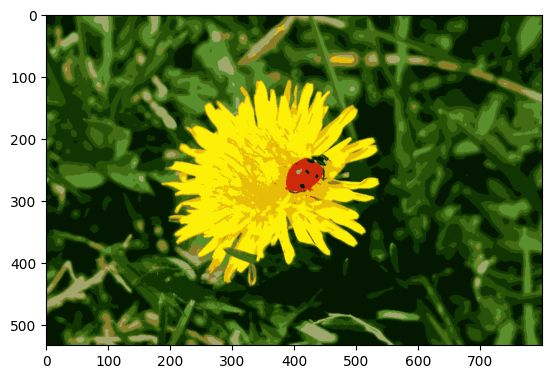

In [25]:
plt.imshow(img_out)
plt.savefig("my_picture.png")

#### 8. Crea una función
Crea una función que tenga como argumentos de entrada una imagen, el numero de colores que quieres que tenga, y si se quiere guardar la imagen (siempre se mostrará)

In [26]:
def agg_colors(img_path, n_colors, save_path=None):

    image = imread(img_path)
    image_res = image.reshape(image.shape[0] * image.shape[1], -1)

    kmeans = KMeans(n_clusters = n_colors, random_state = 0)
    kmeans.fit(image_res)

    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    labels_unique = np.unique(labels)

    try:
        image_out = np.zeros(shape = (image.shape[0] * image.shape[1], image.shape[2]))
    except:
        image_out = np.zeros(shape = (image.shape[0] * image.shape[1]))

    for clus in labels_unique:
        center_clus = centers[clus]
        idx_clus = np.where(labels == clus)[0]
        image_out[idx_clus] = center_clus
    
    img_out = image_out.reshape(image.shape)

    plt.imshow(img_out)

    if save_path is not None:
        plt.savefig(save_path)

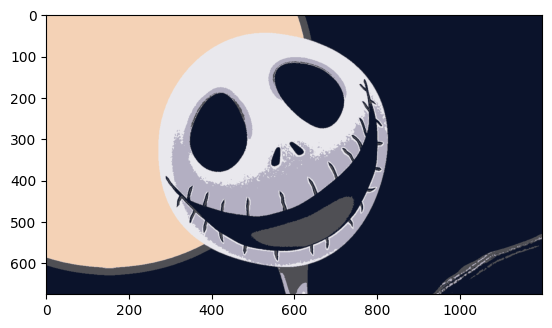

In [31]:
agg_colors('PROF_img/ps.png', 5, save_path='ps_filter.png')